# Lecture Notes - Classification #

**Helpful Resource:**
- [Python Reference](http://data8.org/sp22/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Recommended Readings:**
- [Classification](https://inferentialthinking.com/chapters/17/Classification.html)
- [Nearest Neigbors](https://inferentialthinking.com/chapters/17/1/Nearest_Neighbors.html)
- [Training & Testing](https://inferentialthinking.com/chapters/17/2/Training_and_Testing.html)
- [Rows of Tables](https://inferentialthinking.com/chapters/17/3/Rows_of_Tables.html)
- [Implementing the Classifier](https://inferentialthinking.com/chapters/17/4/Implementing_the_Classifier.html)

In [34]:
# Run this cell to set up the notebook, but please don't change it.
import numpy as np
import math
import datascience
from datascience import *

# These lines set up the plotting functionality and formatting.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter("ignore")

## Classification

Classification in data science is about learning how to make predictions based on the past examples.

Classificaiton is a technique often used in machine learning.

### Sample Predictions

1. Credit card companies: Is this transaction fraudulent?
2. Doctors: Does this patient have cancer?
3. Election: Are you going to vote this candidate or another?

### Data and Training Set

To make predictions, it requires data. Classification involves looking for patterns, and to find patterns, we need data.

Essentially, we need **training data**: a bunch of observations. Observation is an entity that can be an individual or situation where we know the class of each observation, such as whether the transaction is fraudulent, the patient has cancer, etc. The typical classes are yes or no. We usually use 1 (class 1) to represent yes and 0 (class 0) represent no.

**Class** is a result of an observation.

**Training set** is a collection of these pre-classified observations.

Then we will need a **classification algorithm** to analyze the training set, and then come up with a **classifier** which is an algorithm for predicting the class of future observations. The purpose of a classifier is to classify unseen data that is similar to the training data. 

**Test dataset** help us determine the accuracy of our predictions by comparing the actual genres of the movies with the genres that our classifier predicts.

Note that classifiers do not need to be perfect to be useful. They can be useful even if their accuracy is less than 100%. For instance, if the online dating site occasionally makes a bad recommendation, that’s OK; their customers already expect to have to meet many people before they’ll find someone they hit it off with. Of course, you don’t want the classifier to make too many errors — but it doesn’t have to get the right answer every single time.

### Classification Example 

#### Classifying Patients

Class 1 are patients with CKD;

Class 0 are patients without CKD;

Each row represents a blood test result of a patient. Each column represents an element tested in the blood. Some are numerical, others are strings. We use numeric data for developing classifier algorithms. We also call each column as a **feature** when developing classifier algorithms.

In [35]:
# step 1: load the data to a table and visually inspect the dataset

ckd = Table.read_table('ckd.csv').relabeled('Blood Glucose Random', 'Glucose')
ckd.show(3)

Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
48,70,1.005,4,0,normal,abnormal,present,notpresent,117,56,3.8,111,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,1
53,90,1.02,2,0,abnormal,abnormal,present,notpresent,70,107,7.2,114,3.7,9.5,29,12100,3.7,yes,yes,no,poor,no,yes,1
63,70,1.01,3,0,abnormal,abnormal,present,notpresent,380,60,2.7,131,4.2,10.8,32,4500,3.8,yes,yes,no,poor,yes,no,1


In [36]:
# step 2: check numbers of classes in the dataset, 
#         use tbl.group() function

# 2 classes in the dataset, 
#         0 represents patients without CKD
#         1 represents patients with CKD

ckd.group('Class')

Class,count
0,115
1,43


## Visualize the relation between the two variables ##

Class 1 Blue dots are patients with CKD; 

Class 0 Gold dots are patients without CKD.

Each element in the blood contributes a bit to having or not having the CKD. Typtically more data is better to develop an algorithm to train a machine to make decision, concurrently could be more complex. Let's start with visualizing the relation between 2 elements (variables).

In [37]:
# step 3: create a color table for plotting a graph,
#         make sure to have a common column as in the dataset,
#         the common column is the results of all observations in rows,
#         we typtically call it Class

color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)

# step 4: use tbl.join() function to combine the color table with the dataset
ckd = ckd.join('Class', color_table)
ckd

Class,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Color
0,40,80,1.025,0,0,normal,normal,notpresent,notpresent,140,10,1.2,135,5,15,48,10400,4.5,no,no,no,good,no,no,gold
0,23,80,1.025,0,0,normal,normal,notpresent,notpresent,70,36,1,150,4.6,17,52,9800,5,no,no,no,good,no,no,gold
0,45,80,1.025,0,0,normal,normal,notpresent,notpresent,82,49,0.6,147,4.4,15.9,46,9100,4.7,no,no,no,good,no,no,gold
0,57,80,1.025,0,0,normal,normal,notpresent,notpresent,119,17,1.2,135,4.7,15.4,42,6200,6.2,no,no,no,good,no,no,gold
0,51,60,1.025,0,0,normal,normal,notpresent,notpresent,99,38,0.8,135,3.7,13,49,8300,5.2,no,no,no,good,no,no,gold
0,34,80,1.025,0,0,normal,normal,notpresent,notpresent,121,27,1.2,144,3.9,13.6,52,9200,6.3,no,no,no,good,no,no,gold
0,60,80,1.025,0,0,normal,normal,notpresent,notpresent,131,10,0.5,146,5,14.5,41,10700,5.1,no,no,no,good,no,no,gold
0,38,60,1.02,0,0,normal,normal,notpresent,notpresent,91,36,0.7,135,3.7,14,46,9100,5.8,no,no,no,good,no,no,gold
0,42,80,1.02,0,0,normal,normal,notpresent,notpresent,98,20,0.5,140,3.5,13.9,44,8400,5.5,no,no,no,good,no,no,gold
0,35,80,1.02,0,0,normal,normal,notpresent,notpresent,104,31,1.2,135,5,16.1,45,4300,5.2,no,no,no,good,no,no,gold


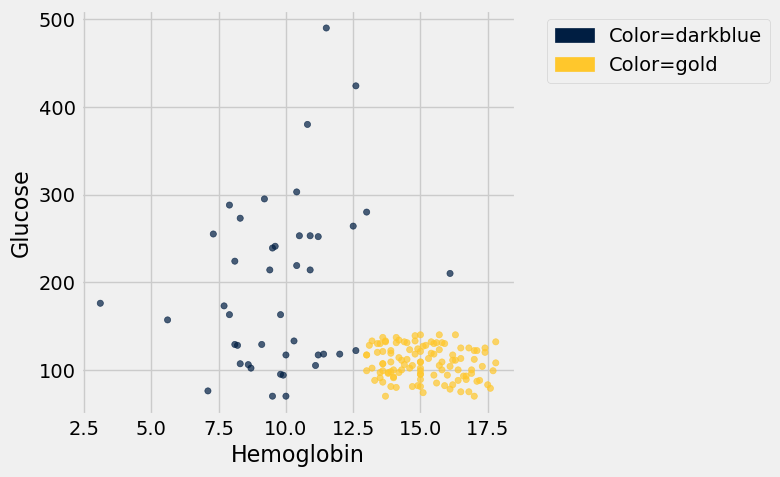

In [38]:
# step 5a: draw a scatter plot to visualize the relation between Hemoglobin and Glucose
ckd.scatter('Hemoglobin', 'Glucose', group='Color')

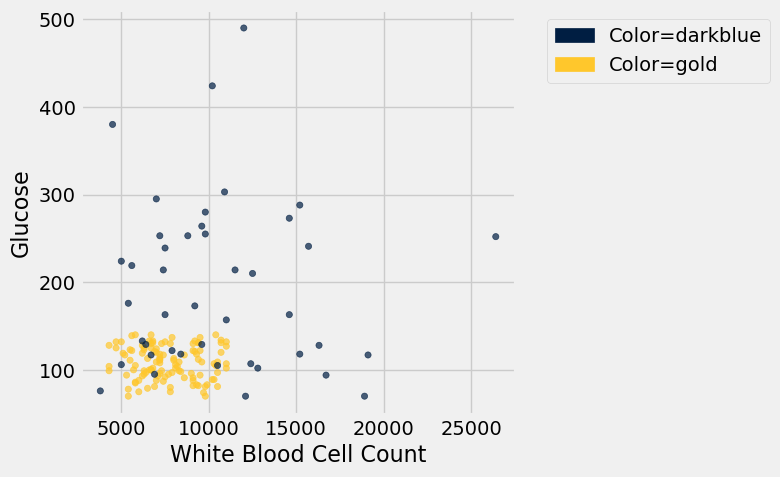

In [39]:
# step 5b: draw a scatter plot to visualize the relation between WBC count and Glucose
ckd.scatter('White Blood Cell Count', 'Glucose', group='Color')

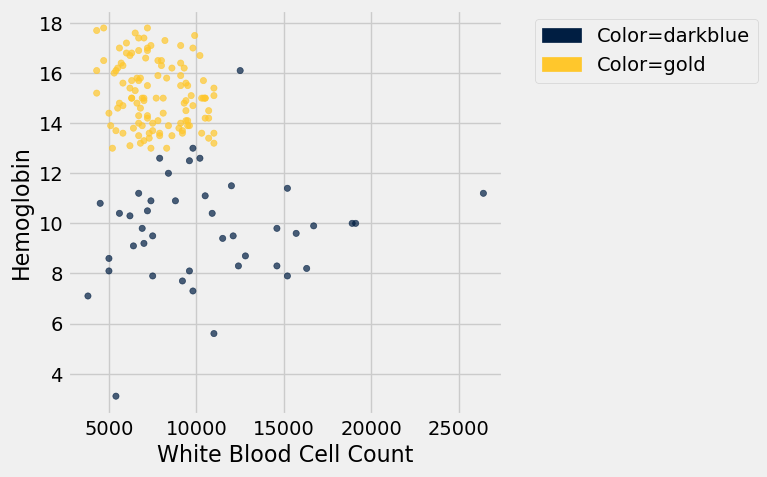

In [40]:
# step 5c: draw a scatter plot to visualize the relation between WBC count and Hemoglobin
ckd.scatter('White Blood Cell Count', 'Hemoglobin', group='Color')

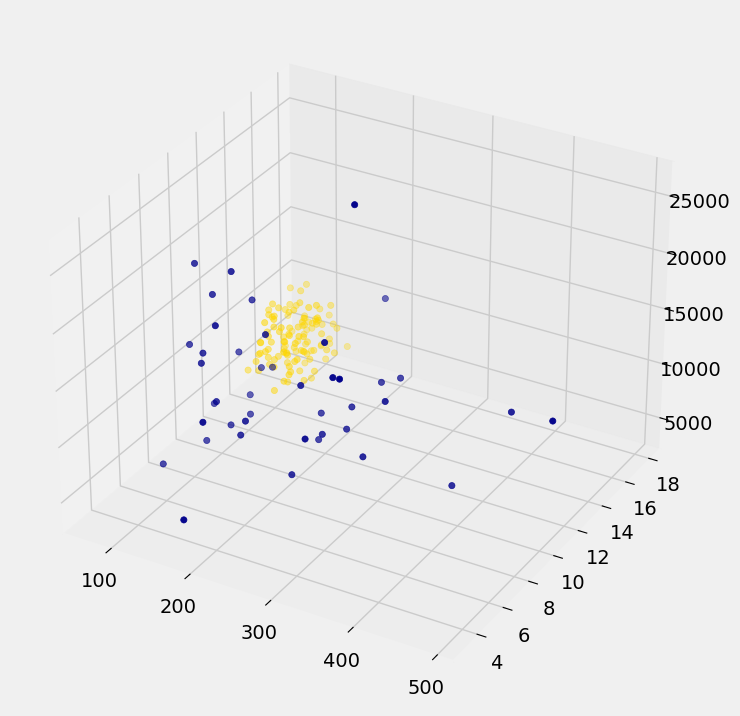

In [41]:
# Let's take a look at a 3D view when we combine Glucose, Hemoglobin, and WBC count

ax = plots.figure(figsize=(8,10)).add_subplot(111, projection='3d')
ax.scatter(ckd.column('Glucose'), 
           ckd.column('Hemoglobin'), 
           ckd.column('White Blood Cell Count'), 
           c=ckd.column('Color'));

Theoretically, we can build a classifier algorithm with many features that will make highly accurate predictions.

Limitations:
1. Any plots of 4D or above could be challenging to visualize in human eyes.
3. Computational resources may limit numbers of features for classifier algorithm development.

Side note: Matplotlib doesn't have direct support for 4D plotting.

## Nearest Neighbors Classifier ##

In [42]:
# 15.2.1. Measuring in Standard Units -
#         https://inferentialthinking.com/chapters/15/2/Regression_Line.html#measuring-in-standard-units
def standard_units(x):
    "Convert the input x to standard units."
    return (x - np.mean(x))/np.std(x)

# function distance() which returned the distance between two points. 
# We used it in two-dimensions, but the great news is that 
# the function doesn’t care how many dimensions there are! 
# It just subtracts the two arrays of coordinates (no matter how long the arrays are), 
# squares the differences and adds up, and then takes the square root. 
# To work in multiple dimensions, we don’t have to change the code at all.

def distance(point1, point2):
    """The distance between two arrays of numbers."""
    return np.sqrt(np.sum((point1 - point2)**2))

def all_distances(training, point):
    """The distance between p (an array of numbers) and the numbers in row i of attribute_table."""
    attributes = training.drop('Class')
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point)

def table_with_distances(training, point):
    """A copy of the training table with the distance from each row to array p."""
    return training.with_column('Distance', all_distances(training, point))

def closest(training, point, k):
    """A table containing the k closest rows in the training table to array p."""
    with_dists = table_with_distances(training, point)
    sorted_by_distance = with_dists.sort('Distance')
    topk = sorted_by_distance.take(np.arange(k))
    return topk

def show_closest_2d(point, data_tbl, col1, col2, k):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    train_features = data_tbl.select('Class', col1, col2)
    t = closest(train_features, point, k)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    data_tbl.scatter(col1, col2, group='Color')
    plots.scatter(point.item(0), point.item(1), color='red', s=30)
    plots.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), color='k', lw=2);
    
    
def show_closest_3d(point, data_tbl, col1, col2, col3, k):
    """point = array([x,y]) 
    gives the coordinates of a new point
    shown in red"""
    
    trainFeatures = data_tbl.select('Class', col1, col2, col3)
    t = closest(trainFeatures, point, k)
    x_closest = t.row(0).item(1)
    y_closest = t.row(0).item(2)
    z_closest = t.row(0).item(3)
    ax = plots.figure(figsize=(8,10)).add_subplot(111, projection='3d')
    ax.scatter(data_tbl.column(col1), 
               data_tbl.column(col2), 
               data_tbl.column(col3), 
               c=data_tbl.column('Color'));
    ax.scatter(point.item(0), point.item(1), point.item(2), color='red', s=30)
    ax.plot(make_array(point.item(0), x_closest), make_array(point.item(1), y_closest), make_array(point.item(2), z_closest), color='k', lw=2);
    
    
def majority(label, table):
    """The majority element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      table: A table.
     
    It returns the most common value in the label column of the table.
    In case of a tie, it returns any one of the most common values.    
    """
    return table.group(label).sort('count', descending=True).column(label).item(0)

In [43]:
# step 6: convert features into standard units
ckd_std_units = Table().with_columns(
    'Hemoglobin', standard_units(ckd.column('Hemoglobin')),
    'Glucose', standard_units(ckd.column('Glucose')),
    'White Blood Cell Count', standard_units(ckd.column('White Blood Cell Count')),
    'Class', ckd.column('Class')
)
ckd_std_units

Hemoglobin,Glucose,White Blood Cell Count,Class
0.456884,0.133751,0.617283,0
1.153,-0.947597,0.424788,0
0.770138,-0.762223,0.200211,0
0.596108,-0.190654,-0.73018,0
-0.239236,-0.49961,-0.0564489,0
-0.0304002,-0.159758,0.232293,0
0.282854,-0.00527964,0.71353,0
0.108824,-0.623193,0.200211,0
0.0740178,-0.515058,-0.0243664,0
0.83975,-0.422371,-1.33975,0


In [44]:
color_table = Table().with_columns(
    'Class', make_array(1, 0),
    'Color', make_array('darkblue', 'gold')
)
ckd_std_units = ckd_std_units.join('Class', color_table)

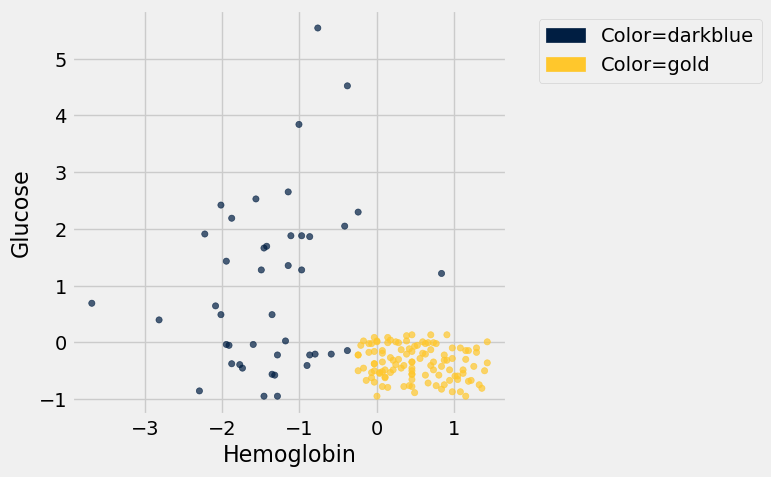

In [45]:
ckd_std_units.scatter('Hemoglobin', 'Glucose', group='Color')

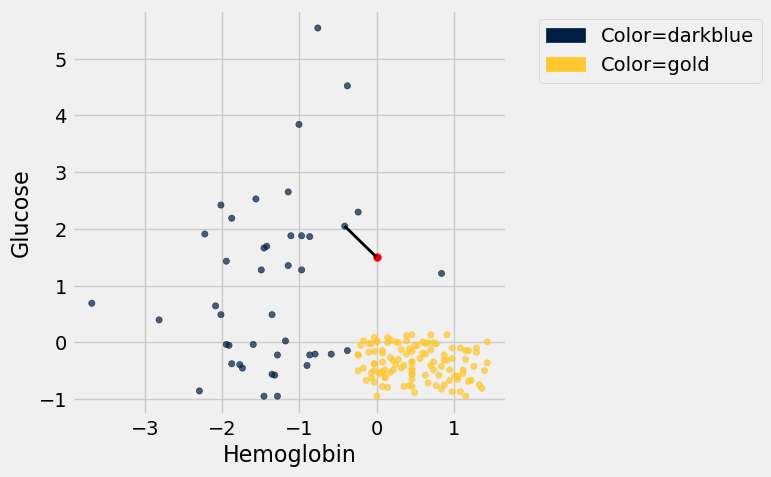

In [46]:
# In this example, Alice's Hemoglobin is 0 and her Glucose is 1.5.
#   we look for the patient closest to Alice
alice = make_array(0, 1.5)
show_closest_2d(alice, ckd_std_units, 'Hemoglobin', 'Glucose', 1)

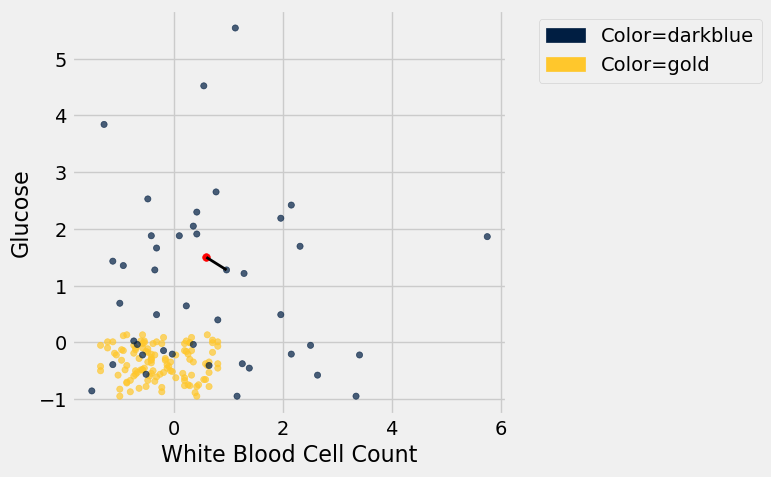

In [47]:
# In this example, Alice's WBC count is 0.6 and her Glucose is 1.5.
#   we look for the patient closest to Alice
alice = make_array(0.6, 1.5)
show_closest_2d(alice, ckd_std_units, 'White Blood Cell Count', 'Glucose', 1)

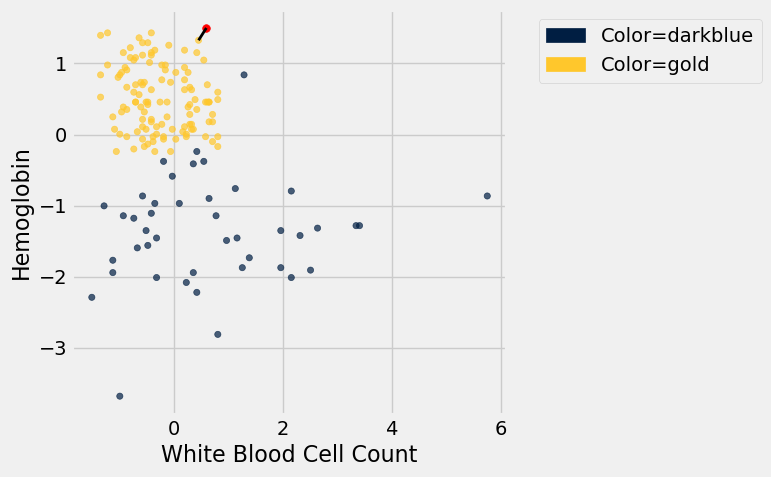

In [48]:
# In this example, Alice's  is WBC count 0.6 and her Hemoglobin is 1.5.
#   we look for the patient closest to Alice
alice = make_array(0.6, 1.5)
show_closest_2d(alice, ckd_std_units, 'White Blood Cell Count', 'Hemoglobin', 1)

## Use more features for more accurate predictions ##
As you see, our predictions are not consistent when we look at 2 features in the blood tests.

Let see what happens if we check out all 3 features - Glucose, Hemoglobin and WBC count. 

In general, more features are put into consideration, more accurate predictions will be.

We will have a 3D plot.

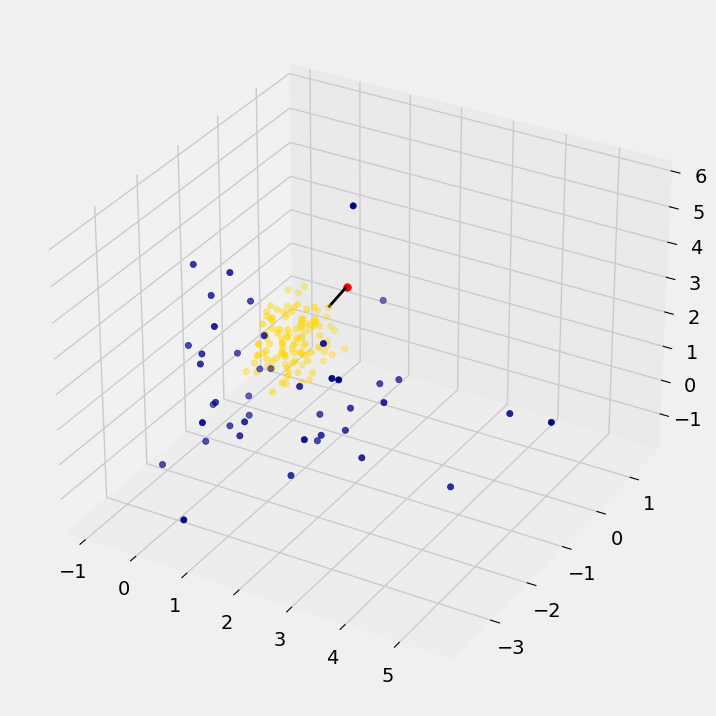

In [49]:
# x - gloucose: 0, y - hemoglobin: 1.5, z - white blood cell count: 0.6
alice = make_array(0, 1.5, 0.6)
show_closest_3d(alice, ckd_std_units, 'Glucose', 'Hemoglobin', 'White Blood Cell Count', 1)

## One neighbor vs. multiple neighbors

So far, we make our prediction based on only 1 nearest neighbor. Sometimes, the second nearest neighbor is only tiny bit away but may have an opposite result as the first nearest neighbor, and that make our prediction uncertain.

So, we are going to take vote to a few more nearest neighbors, then we consider the majority and make a prediction.

In [ ]:
AllFeatures = ckd_std_units.drop('Color')

# gloucose: 0, hemoglobin: 1.5, white blood cell count: 0.6
newPatient = make_array(0, 1.5, 0.6)
topk = closest(AllFeatures, newPatient, 7)
topk.show()

In [ ]:
majority("Class", topk)

## K-Nearest Neighbors ##

[K-Nearest Neighbors (k-NN)](https://inferentialthinking.com/chapters/17/1/Nearest_Neighbors.html) is a classification algorithm.  Given some numerical *attributes* (also called *features*) of an unseen example, it decides which category that example belongs to based on its similarity to previously seen examples.

Predicting the category of an example is called *labeling*, and the predicted category is also called a *label*.

The whole idea of K-Nearest Neighbors is to compute the distances between an unseen example and the previously seen examples. That will produce a bunch of distance values. Out of the distance values, we examine a few of the nearest neighbors and predict the class for the unseen example.

## Implement a Movie Genre Classifier (Project 3) ##

An attribute (feature) we have about each movie is *the proportion of times a particular word appears in the movie*, and the labels are two movie genres: comedy and thriller.  The algorithm requires many previously seen examples for which both the attributes and labels are known: that's the `train_movies` table.

We'll be trying to predict each movie's genre from the text of its screenplay. In particular, we have compiled a list of 5,000 words that occur in conversations between movie characters. For each movie, our dataset tells us the frequency with which each of these words occurs in certain conversations in its screenplay. All words have been converted to lowercase.

## Steps to implement classifier ##

1. load the data to a table and visually inspect the dataset
2. check numbers of classes in the dataset, use tbl.group() function
3. split the dataset into a training set and a test set
4. pick a sample from the test set and pick 2 features(columns) to test the classifier algorithm
5. compute the distances between an unseen sample and the previously seen samples
6. examine a few of the nearest neighbors
7. predict the class for the unseen sample


In [2]:
# step 1: load the table

movies = Table.read_table('movies.csv')
#movies.take(0).select(0, 1, 2, 3, 4, 'hei', 'you', 1042, 'fun')
movies.take(100).select(0, 1, 2, 3, 4, 14, 49, 1042, 4004)


Title,Year,Rating,Genre,# Words,breez,england,it,bravo
game 6,2005,6,comedy,5556,0,0.000188537,0.0263952,0


In [3]:
# step 2: check numbers of classes in the dataset, use tbl.group() function
movies.group('Genre')

Genre,count
comedy,119
thriller,214


In [8]:
# step 3: split the dataset into a training set and a test set

training_proportion = 17/20

num_movies = movies.num_rows
num_train = int(num_movies * training_proportion)
num_test = num_movies - num_train

train_movies = movies.take(np.arange(num_train))
test_movies = movies.take(np.arange(num_train, num_movies))

print("Training: ",   train_movies.num_rows, ";",
      "Test: ",       test_movies.num_rows)

Training:  283 ; Test:  50


In [14]:
# step 4: pick a sample from the test set and 
#         pick 2 features(columns) to test the classifier algorithm
test_movies.where('Title', 'monty python and the holy grail')

# we use 'water' and 'feel' features

Title,Year,Rating,Genre,# Words,she,decid,talk,wit,razor,slam,credit,rai,hugh,breez,conscienc,audienc,cathi,log,met,chosen,grip,booz,bianca,doubl,agent,exit,carpent,underground,clemenza,gain,neg,majesti,studio,chri,spin,greater,eaten,vibrat,stupid,cigarett,jesu,mani,violin,financi,bai,cop,neighbor,cd,england,made,conni,instinct,took,jacquelin,mace,disappear,waltz,behind,bourbon,favorit,benni,manhattan,nixon,lunch,principl,tradit,counterfeit,sophi,third,exist,wouldv,hero,theyr,anytim,christin,vallei,chess,paid,burglar,nostril,rubber,human,british,plissken,eddi,gee,offend,rebecca,anger,plant,famou,repres,latest,rent,dip,bell,andi,so,london,cooler,keaton,portland,headlin,whatta,fatal,sew,cheer,davi,feed,hudson,ambros,digest,redi,fri,staff,casino,occasion,shadow,work,restrain,face,exercis,sidnei,pile,whyd,teenag,her,retir,hazard,roth,hurrican,impuls,ranger,pour,lester,slash,deer,could,vital,qualiti,coma,incred,hank,famili,duchess,global,virgin,scientif,between,holidai,qualifi,moor,happili,arizona,non,bruce,ankl,constant,buzz,harder,ing,christian,palmer,tent,sunset,damour,cohaagen,advertis,sensat,local,there,terri,sedat,rotten,struck,deck,past,bro,ann,dump,kane,slot,immun,block,lil,technic,tactic,pencil,outsid,laboratori,easi,nephew,coffin,pretti,coward,verbal,permiss,bartend,wont,watch,lindenmey,cosmo,capabl,flirt,huge,berkelei,max,walter,lime,rico,marvin,aboard,bacon,account,kirk,quaid,stunt,closet,due,nuclear,blind,pussi,howdi,snuff,eas,now,leak,underwear,westlei,mayb,theo,limo,cousin,illeg,silli,against,done,district,invad,ryan,wait,grudg,charact,hick,jami,lifetim,lecktor,and,republican,life,hidden,wire,paranoia,network,messi,uthatu,effort,carri,windham,fun,psychologist,sean,scent,answer,mom,wake,sign,ho,relat,jame,fat,myself,disrupt,scan,vagu,basket,christma,estim,em,union,involv,norman,suspici,becom,shoe,librari,administr,ford,complic,stuck,justic,attack,releas,econom,hesit,autopsi,jurisdict,four,factor,inquiri,lion,meanwhil,prison,blair,seri,groceri,surgeri,season,christi,clean,ow,wrestl,en,moral,hungri,cole,surfer,sixteen,angl,shame,barrel,major,ago,lott,airplan,worth,train,easili,feller,valentin,harvei,wherev,francisco,true,dramat,boston,besid,inspector,orlean,opportun,nearli,lindsei,photograph,frame,at,psychopath,press,youyou,havana,australia,plai,mayfield,chick,stewart,seven,reflect,outer,vega,anywai,prime,farmer,backyard,joe,otherwis,cowgirl,grate,clerk,dispos,tow,mari,certifi,thi,wheel,privaci,todai,nathan,teller,plot,correct,couch,job,hurt,inject,chocol,session,outrag,reduc,knew,jd,perfum,fabric,bodyguard,think,il,yesterdai,side,doesnt,ronni,blank,jess,push,ahh,jealou,alter,blew,bu,off,sweetheart,abl,angelo,nicer,coupla,resum,coke,strangl,gut,morn,miracl,bit,intimid,pipelin,sour,shep,vivian,grave,chemic,czech,scholarship,oldfashion,accent,spitz,dirti,shot,lit,cedar,pirat,weather,stun,learn,wick,bring,slack,brave,shakespear,monkei,presum,vacat,faint,strap,stephen,maggi,indic,sundai,nois,organ,terranc,foundat,littl,perman,insid,stabl,sharp,uptight,wholl,jeffrei,root,thy,josi,woman,post,judg,ralph,amaz,surf,naughti,norm,glove,cigar,wendi,corpor,statement,defin,drawn,progress,year.1,shovel,sequenc,andand,reel,held,youv,trick,horseman,whoa,emploi,chain,cmon,brief,creativ,moscow,challeng,walli,golf,abort,aha,bent,exclus,amber,figur,healthi,ransom,steer,blow,bark,imbecil,mother,had,whatev,donit,goodby,terrifi,cash,descript,spell,west,shoulda,when,wear,crop,trapper,donat,breath,bracelet,lover,afraid,vice,ms,didnt,kill,depth,si,experiment,dna,desmond,coconut,dil,llewelyn,spoil,lung,attent,offens,babi,havin,mustnt,creepi,daniel,abandon,less,go,negoti,butcher,sudden,templ,ii,alex,deal,rememb,polic,gasolin,luggag,smooth,declar,chase,host,uptown,heavi,tenni,picard,success,as,heroin,hi,seduc,den,accur,parasit,fiddl,altern,chees,flatter,lloyd,collector,athlet,useless,yeh,lawsuit,guitar,apart,strong,ditch,doc,wors,trigger,mister,request,direct,telephon,expir,blond,energi,eh,damag,across,anni,eleven,episod,reliant,jason,get,duh,victor

In [12]:
# step 5: compute the distances between an unseen sample and 
#         the previously seen samples

# Given functions:

title_index = movies.index_by('Title')
def row_for_title(title):
    """Return the row for a title, similar to the following expression (but faster)
    
    movies.where('Title', title).row(0)
    """
    return title_index.get(title)[0]


def plot_with_two_features(test_movie, training_movies, x_feature, y_feature):
    """Plot a test movie and training movies using two features."""
    test_row = row_for_title(test_movie)
    distances = Table().with_columns(
            x_feature, [test_row.item(x_feature)],
            y_feature, [test_row.item(y_feature)],
            'Color',   ['unknown'],
            'Title',   [test_movie]
        )
    for movie in training_movies:
        row = row_for_title(movie)
        distances.append([row.item(x_feature), row.item(y_feature), row.item('Genre'), movie])
    distances.scatter(x_feature, y_feature, group='Color', labels='Title', s=50)

## Compute distance ##

We refer to a straight-line distance.

**This distance is called the Euclidean ("yoo-KLID-ee-un") distance, whose formula is $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$.**

For example, in the movie *Clerks.* (in the training set), 0.00016293 of all the words in the movie are "water" and 0.00154786 are "feel".  Its distance from *Monty Python and the Holy Grail* on this 2-word feature set is $\sqrt{(0.000804074 - 0.000162933)^2 + (0.0010721 - 0.00154786)^2} \approx 0.000798379$.  (If we included more or different features, the distance could be different.)

*Monty Python and the Holy Grail* has 0.000804074 on "water" and 0.0010721 on "feel".

If we consider more than 2 words for predictions, we make multi-dimensional space. Then we will keep adding the additional dimensional spaces inside the square root.

$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + (z_1 - z_2)^2}$

$\sqrt{(a_1 - a_2)^2 + (b_1 - b_2)^2 + (c_1 - c_2)^2 + (d_1 - d_2)^2}$

In [15]:
# Our test sample movie is Monty Python and the Holy Grail
#     the features "water" and "feel" are used for prediction


# We create a function to compute distance between between two movies - title0 and title1 
#     based on two features -  x_feature and y_feature
def distance_two_features(title0, title1, x_feature, y_feature):
    """Compute the distance between two movies with titles title0 and title1.
    Only the features named x_feature and y_feature are used when computing the distance.
    """
    row0 = row_for_title(title0)
    row1 = row_for_title(title1)
    return ((row0.item(x_feature) - row1.item(x_feature))**2 + (row0.item(y_feature) - row1.item(y_feature))**2)**0.5
    #return np.sqrt((row0.item(x_feature) - row1.item(x_feature))**2 + (row0.item(y_feature) - row1.item(y_feature))**2)

# Then, we create a function to compute distance between the given movie and 
#     "monty python and the holy grail", based on the features "water" and "feel"

def distance_from_python(title):
    """The distance between the given movie and "monty python and the holy grail", 
    based on the features "water" and "feel".
    
    This function takes a single argument:
      title: A string, the name of a movie.
    """
    
    return distance_two_features(title, "monty python and the holy grail", "water", "feel")

In [25]:
# Test the functions distance_two_features() and distance_from_python()

# Calculate the distance between a seen sample movie and "Monty Python and the Holy Grail"
#train_movies.select('Title').show()
distance_from_python('the silence of the lambs')
distance_from_python('jurassic park iii')

0.0011555710077488356

In [28]:
# step 6: examine a few of the nearest neighbors - K-Nearest Neighbors

# create a table from the train_movies table.
#      The table contains the columns of Title, Genre and 
#      only the feature we are checking - water and feel
water_feel = train_movies.select("Title", "Genre", "water", "feel")

# use tbl.apply() function to compute the distances between 
#     "Monty Python and the Holy Grail" and movies in the training set
water_feel_distance = water_feel.apply(distance_from_python, 'Title')

# add the distance column to the table
close_movies = water_feel.with_column('distance from python', water_feel_distance)

# sort the table in ascending order and take the first 5 rows
close_movies.sort('distance from python').take(np.arange(5))

# alternatively, we can do it in 1 line
#close_movies = water_feel.with_column('distance from python', water_feel.apply(distance_from_python, 'Title'))\
#                        .sort('distance from python')\
#                       .take(np.arange(5))

Title,Genre,water,feel,distance from python
alien,thriller,0.00070922,0.00124113,0.000193831
tomorrow never dies,thriller,0.000888889,0.000888889,0.00020189
the silence of the lambs,thriller,0.000595948,0.000993246,0.000222563
innerspace,comedy,0.000522193,0.00104439,0.00028324
some like it hot,comedy,0.000528541,0.000951374,0.00030082


In [31]:
# step 7: predict the class for the unseen sample

# group the table by class and sort by count column in descending order
def majority(label, table):
    """The majority element in a column of a table.
    
    This function takes two arguments:
      label: The label of a column, a string.
      table: A table.
     
    It returns the most common value in the label column of the table.
    In case of a tie, it returns any one of the most common values.    
    """
    return table.group(label).sort('count', descending=True).column(label).item(0)

majority('Genre', close_movies)

'thriller'